In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt


ds_test = tfds.load("patch_camelyon", split="train[90%:]", as_supervised=True
for i, (image, label) in enumerate(ds_test.take(5)):  
    img = tf.image.resize(image, (96, 96)) 
    img_path = f"/kaggle/working/test_img_{i}_label_{label.numpy()}.png"
    tf.keras.preprocessing.image.save_img(img_path, img)
    print(f"Saved: {img_path}")


2025-04-12 15:26:10.058245: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744471570.311608      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744471570.375423      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating test examples...:   0%|          | 0/32768 [00:00<?, ? examples/s]

I0000 00:00:1744471803.304305      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Shuffling /root/tensorflow_datasets/patch_camelyon/incomplete.Y4QN86_2.0.0/patch_camelyon-test.tfrecord*...:  …

Generating train examples...:   0%|          | 0/262144 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/patch_camelyon/incomplete.Y4QN86_2.0.0/patch_camelyon-train.tfrecord*...: …

Generating validation examples...:   0%|          | 0/32768 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/patch_camelyon/incomplete.Y4QN86_2.0.0/patch_camelyon-validation.tfrecord*…

Dataset patch_camelyon downloaded and prepared to /root/tensorflow_datasets/patch_camelyon/2.0.0. Subsequent calls will reuse this data.
Saved: /kaggle/working/test_img_0_label_1.png
Saved: /kaggle/working/test_img_1_label_0.png
Saved: /kaggle/working/test_img_2_label_0.png
Saved: /kaggle/working/test_img_3_label_0.png
Saved: /kaggle/working/test_img_4_label_0.png


In [3]:
from IPython.display import FileLink

for i in range(5): 
    display(FileLink(f"/kaggle/working/test_img_{i}_label_1.png")) 


/kaggle/working/test_img_0_label_1.png

/kaggle/working/test_img_1_label_1.png

/kaggle/working/test_img_2_label_1.png

/kaggle/working/test_img_3_label_1.png

/kaggle/working/test_img_4_label_1.png

In [7]:
import tensorflow as tf


class PatchExtractor(tf.keras.layers.Layer):
    def __init__(self, patch_size, **kwargs):
        super().__init__(**kwargs)  
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID',
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches


class PatchEncoder(tf.keras.layers.Layer):
    def __init__(self, num_patches, projection_dim, **kwargs):
        super().__init__(**kwargs)  
        self.num_patches = num_patches
        self.projection = tf.keras.layers.Dense(units=projection_dim)
        self.position_embedding = tf.keras.layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded


In [9]:
model = tf.keras.models.load_model(
    '/kaggle/input/vittt/keras/default/1/vit_model.h5',
    custom_objects={
        'PatchExtractor': PatchExtractor,
        'PatchEncoder': PatchEncoder
    }
)
print(" Model loaded successfully!")


 Model loaded successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


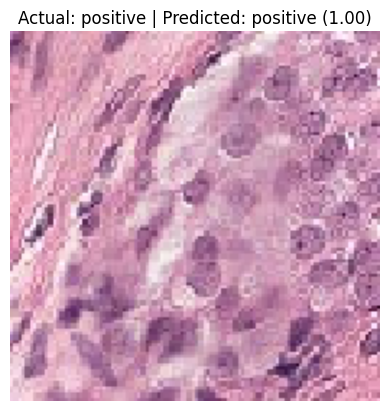

In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os


img_path = '/kaggle/working/test_img_0_label_1.png'  


filename = os.path.basename(img_path)
actual_label = "positive" if "_label_1" in filename else "negative"


img = image.load_img(img_path, target_size=(128, 128))  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0


prediction = model.predict(img_array)[0][0]
pred_label = "positive" if prediction > 0.5 else "negative"
confidence = prediction if prediction > 0.5 else 1 - prediction


plt.imshow(img)
plt.title(f"Actual: {actual_label} | Predicted: {pred_label} ({confidence:.2f})")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


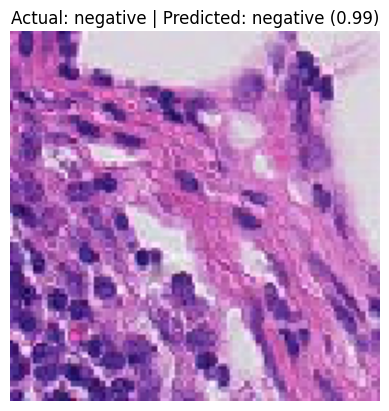

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os


img_path = '/kaggle/working/test_img_3_label_0.png' 


filename = os.path.basename(img_path)
actual_label = "positive" if "_label_1" in filename else "negative"

img = image.load_img(img_path, target_size=(128, 128))  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0


prediction = model.predict(img_array)[0][0]
pred_label = "positive" if prediction > 0.5 else "negative"
confidence = prediction if prediction > 0.5 else 1 - prediction


plt.imshow(img)
plt.title(f"Actual: {actual_label} | Predicted: {pred_label} ({confidence:.2f})")
plt.axis('off')
plt.show()


In [27]:

for i, (image, label) in enumerate(ds_test.take(35)): 
    img = tf.image.resize(image, (96, 96))  
    img_path = f"/kaggle/working/test_img_{i}_label_{label.numpy()}.png"
    tf.keras.preprocessing.image.save_img(img_path, img)
    print(f"Saved: {img_path}")


Saved: /kaggle/working/test_img_0_label_1.png
Saved: /kaggle/working/test_img_1_label_0.png
Saved: /kaggle/working/test_img_2_label_0.png
Saved: /kaggle/working/test_img_3_label_0.png
Saved: /kaggle/working/test_img_4_label_0.png
Saved: /kaggle/working/test_img_5_label_1.png
Saved: /kaggle/working/test_img_6_label_0.png
Saved: /kaggle/working/test_img_7_label_1.png
Saved: /kaggle/working/test_img_8_label_0.png
Saved: /kaggle/working/test_img_9_label_0.png
Saved: /kaggle/working/test_img_10_label_0.png
Saved: /kaggle/working/test_img_11_label_1.png
Saved: /kaggle/working/test_img_12_label_1.png
Saved: /kaggle/working/test_img_13_label_1.png
Saved: /kaggle/working/test_img_14_label_1.png
Saved: /kaggle/working/test_img_15_label_0.png
Saved: /kaggle/working/test_img_16_label_0.png
Saved: /kaggle/working/test_img_17_label_1.png
Saved: /kaggle/working/test_img_18_label_1.png
Saved: /kaggle/working/test_img_19_label_1.png
Saved: /kaggle/working/test_img_20_label_0.png
Saved: /kaggle/working/

In [28]:
import os
import re
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image


test_dir = "/kaggle/working"

image_paths = sorted([
    os.path.join(test_dir, f) for f in os.listdir(test_dir)
    if f.startswith("test_img_") and f.endswith(".png")
])


results = []

for img_path in image_paths:

    match = re.search(r'label_(\d)', img_path)
    actual_label = int(match.group(1)) if match else None


    img = image.load_img(img_path, target_size=(128, 128))  
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array, verbose=0)[0][0]
    predicted_label = 1 if prediction > 0.5 else 0
    confidence = prediction if predicted_label == 1 else 1 - prediction

    results.append({
        'Image': os.path.basename(img_path),
        'Actual Label': actual_label,
        'Predicted Label': predicted_label,
        'Confidence': round(confidence, 4)
    })


df = pd.DataFrame(results)
print(df)



                      Image  Actual Label  Predicted Label  Confidence
0    test_img_0_label_1.png             1                1      0.9991
1   test_img_10_label_0.png             0                0      0.9999
2   test_img_11_label_1.png             1                1      0.9940
3   test_img_12_label_1.png             1                1      0.9187
4   test_img_13_label_1.png             1                1      0.9606
5   test_img_14_label_1.png             1                0      0.5293
6   test_img_15_label_0.png             0                0      0.9974
7   test_img_16_label_0.png             0                0      0.9745
8   test_img_17_label_1.png             1                1      0.7585
9   test_img_18_label_1.png             1                0      0.9895
10  test_img_19_label_1.png             1                1      0.9066
11   test_img_1_label_0.png             0                0      0.8987
12  test_img_20_label_0.png             0                0      0.9178
13  te

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


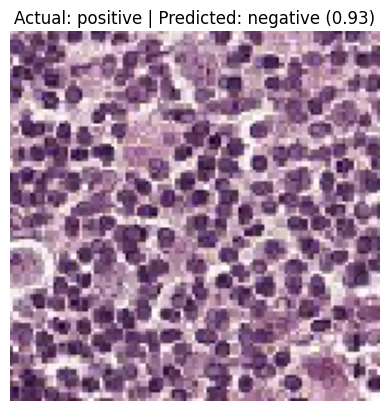

In [33]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os


img_path = '/kaggle/working/test_img_34_label_1.png'  


filename = os.path.basename(img_path)
actual_label = "positive" if "_label_1" in filename else "negative"


img = image.load_img(img_path, target_size=(128, 128))  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0


prediction = model.predict(img_array)[0][0]
pred_label = "positive" if prediction > 0.5 else "negative"
confidence = prediction if prediction > 0.5 else 1 - prediction


plt.imshow(img)
plt.title(f"Actual: {actual_label} | Predicted: {pred_label} ({confidence:.2f})")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


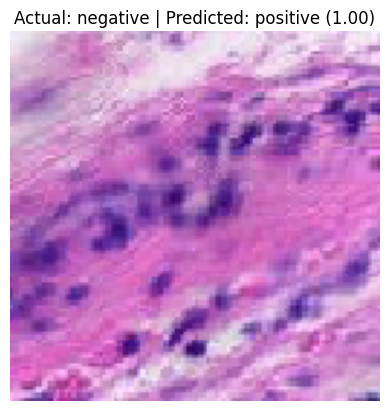

In [29]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os


img_path = '/kaggle/working/test_img_28_label_0.png'  


filename = os.path.basename(img_path)
actual_label = "positive" if "_label_1" in filename else "negative"


img = image.load_img(img_path, target_size=(128, 128))  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0


prediction = model.predict(img_array)[0][0]
pred_label = "positive" if prediction > 0.5 else "negative"
confidence = prediction if prediction > 0.5 else 1 - prediction


plt.imshow(img)
plt.title(f"Actual: {actual_label} | Predicted: {pred_label} ({confidence:.2f})")
plt.axis('off')
plt.show()
